# Evaluation Project 1:

**Project Description:**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


**Input features-**

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.




**To Predict : Number of predicted wins (W)**

In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset:

baseball=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
# To display top 5 rows:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA Analysis:

In [4]:
# To display total number of rows & columns present in Dataset:

baseball.shape

(30, 17)

**There are 30 rows and 17 columns in this dataset.**

In [5]:
# To display all the columns :

baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# To display datatypes of all the columns:

baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

**All the columns are of int64 datatype , except for 1 i.e ERA which is of float datatype.**

# Finding Null values:

In [7]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

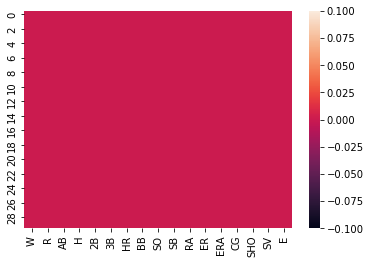

In [8]:
# To Visualize null values present in Dataset:

sns.heatmap(baseball.isnull())

**Great, There are no null values . We can go ahead.**

In [9]:
# To display brief of Dataset :

baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


**We have to predict the output , so it is necessary to analyse the output.**

In [10]:
# To display the unique values in Output:

baseball['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [11]:
# To display number of unique values in Label:

baseball['W'].nunique()

24

**There are 24 unique values in Label.**

In [12]:
# To display total values in Target Variable:

baseball['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [13]:
# To display the Statistics of Continuous Data:

baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


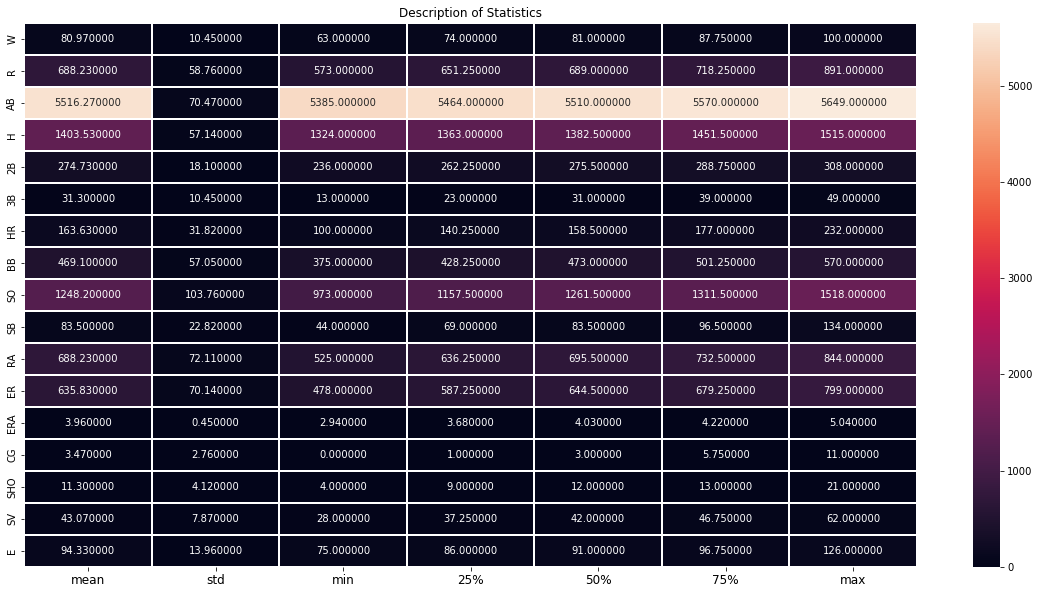

In [14]:
# To Visualize the Statistics of Continuous Data:

plt.figure(figsize=(20,10))
sns.heatmap(round(baseball.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('Description of Statistics')
plt.show()

# Data Visualization:

**Univariate Analysis:**

<AxesSubplot:xlabel='W', ylabel='Count'>

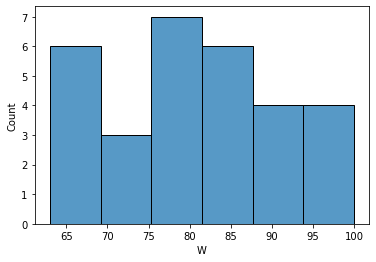

In [15]:
sns.histplot(baseball['W'])

**Observations:**

**1. Plot seems normally distributed as there are no skewness.**

**2. We can see that highest count of win is in between 75-80.**

**3. Total win lies in between 60-100.**

<AxesSubplot:xlabel='R', ylabel='Count'>

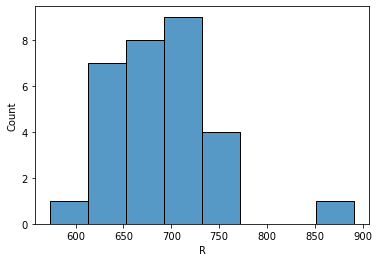

In [16]:
sns.histplot(baseball['R'])

**Observations:**

**1. 'R' (Runs) Column is not normally distributed,as there is some skewness present.**

**2. As we can see that ,Highest Runs (R) count is in between 620-720.**

**3. Here we can see that there are No Runs (Runs) is in between 770-850.**


<AxesSubplot:xlabel='AB', ylabel='Count'>

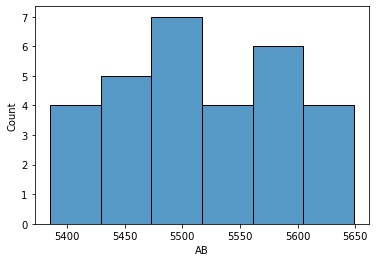

In [17]:
sns.histplot(baseball['AB'])

<AxesSubplot:xlabel='H', ylabel='Count'>

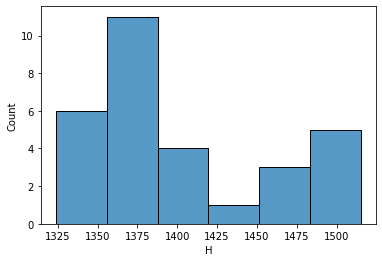

In [18]:
sns.histplot(baseball['H'])

<AxesSubplot:xlabel='2B', ylabel='Count'>

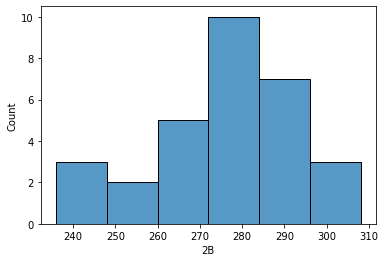

In [19]:
sns.histplot(baseball['2B'])

<AxesSubplot:xlabel='3B', ylabel='Count'>

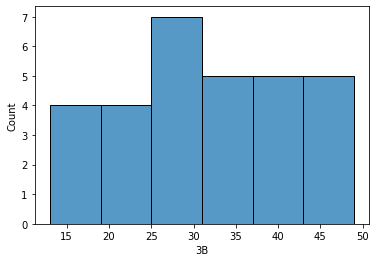

In [20]:
sns.histplot(baseball['3B'])

<AxesSubplot:xlabel='HR', ylabel='Count'>

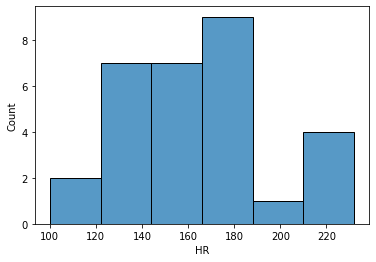

In [21]:
sns.histplot(baseball['HR'])

<AxesSubplot:xlabel='BB', ylabel='Count'>

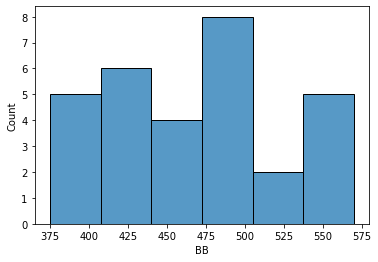

In [22]:
sns.histplot(baseball['BB'])

<AxesSubplot:xlabel='SO', ylabel='Count'>

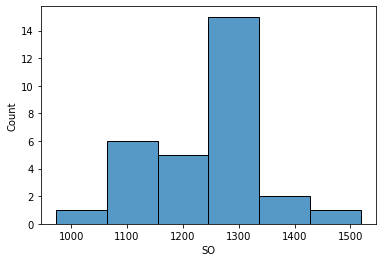

In [23]:
sns.histplot(baseball['SO'])

<AxesSubplot:xlabel='SB', ylabel='Count'>

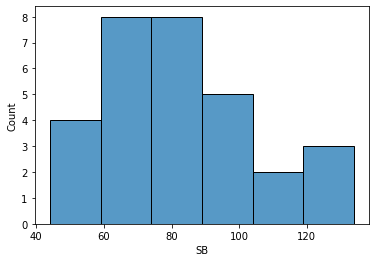

In [24]:
sns.histplot(baseball['SB'])

<AxesSubplot:xlabel='RA', ylabel='Count'>

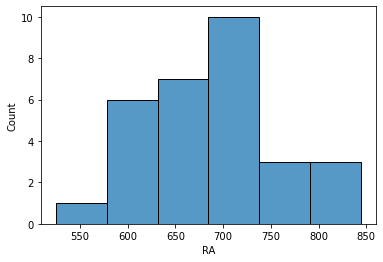

In [25]:
sns.histplot(baseball['RA'])

<AxesSubplot:xlabel='ER', ylabel='Count'>

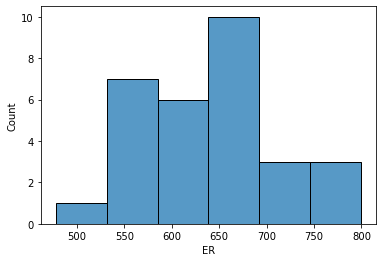

In [26]:
sns.histplot(baseball['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Count'>

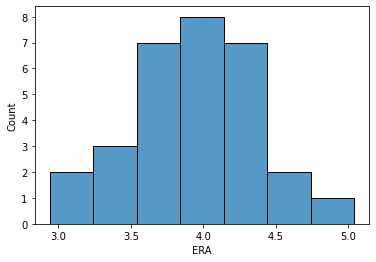

In [27]:
sns.histplot(baseball['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Count'>

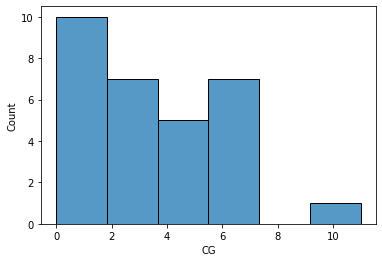

In [28]:
sns.histplot(baseball['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Count'>

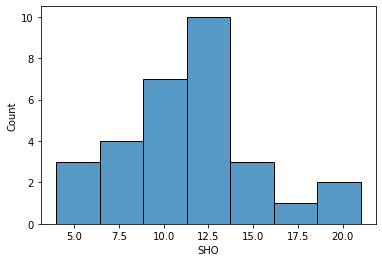

In [29]:
sns.histplot(baseball['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Count'>

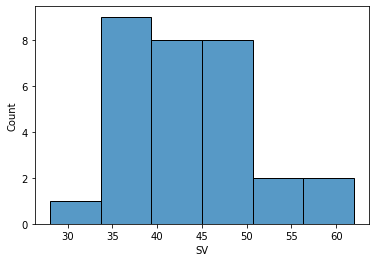

In [30]:
sns.histplot(baseball['SV'])

<AxesSubplot:xlabel='E', ylabel='Count'>

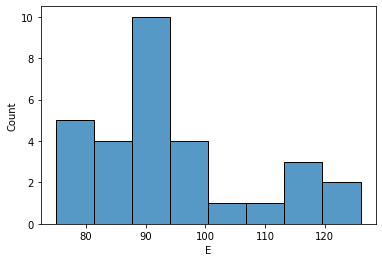

In [31]:
sns.histplot(baseball['E'])

# Normal Distribution Curve:

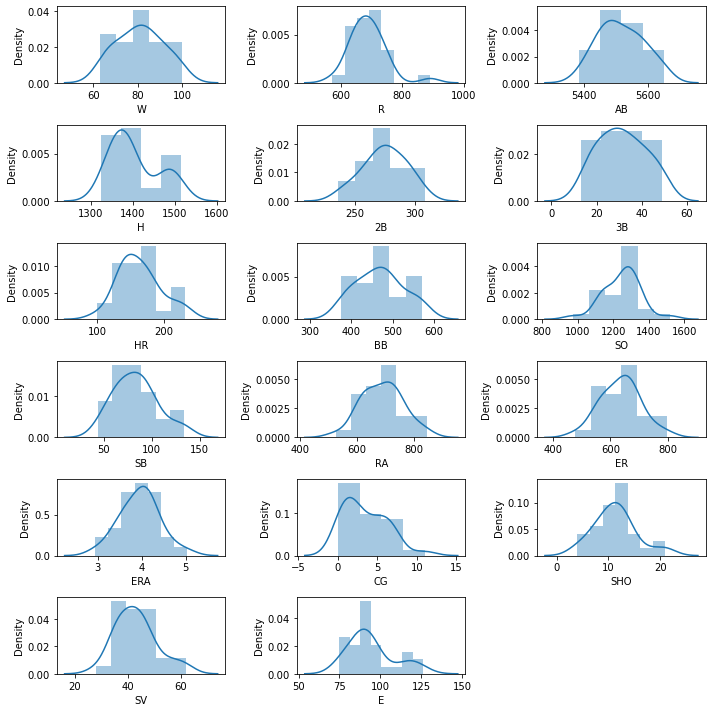

In [32]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in baseball:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(baseball[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**1.There are some columns where almost columns are normally distributed like ,the target column 'W' and columns 'AB','3B','SB','CG', & 'ER' are normally distributed.**

**2. Column 'R' is not normally distributed because there is some left skewness present.**

**3. Column 'H','HR','SV','E' are also not normally distributed because there is right skewness present in these columns.**

**4. Columns '2B','BB','SO','RA','ERA'and'SHO' seems normally distributed , but still there is some skewness present.**

# Bivariate Analysis:

**Let's Compare each column with the target column (W).**

<AxesSubplot:xlabel='R', ylabel='W'>

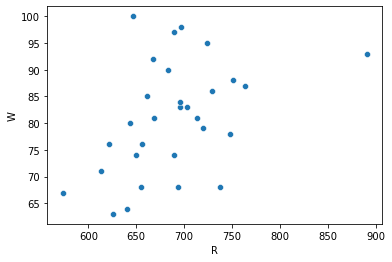

In [33]:
sns.scatterplot(x="R",y="W",data=baseball)

**As We can see that , Column Runs (R) is increasing with  Number of predicted wins (W) , It means Column 'R' is having positive correlation with Column 'W'.**

**Data is not normally distributed ,  as we can see in between 750-900 data is not linear.**

<AxesSubplot:xlabel='AB', ylabel='W'>

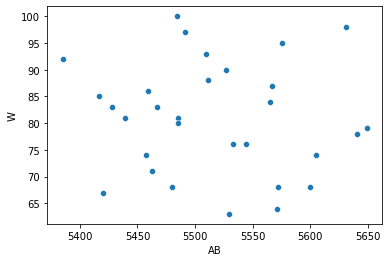

In [34]:
sns.scatterplot(x="AB",y="W",data=baseball)

<AxesSubplot:xlabel='H', ylabel='W'>

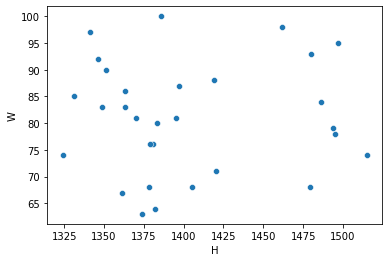

In [35]:
sns.scatterplot(x="H",y="W",data=baseball)

<AxesSubplot:xlabel='2B', ylabel='W'>

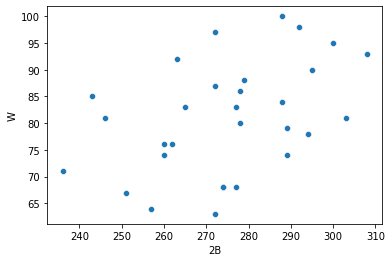

In [36]:
sns.scatterplot(x="2B",y="W",data=baseball)

<AxesSubplot:xlabel='3B', ylabel='W'>

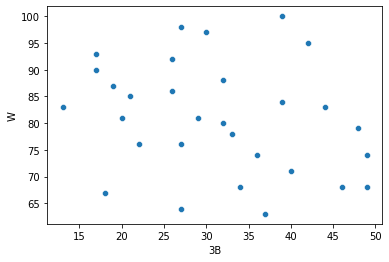

In [37]:
sns.scatterplot(x="3B",y="W",data=baseball)

<AxesSubplot:xlabel='HR', ylabel='W'>

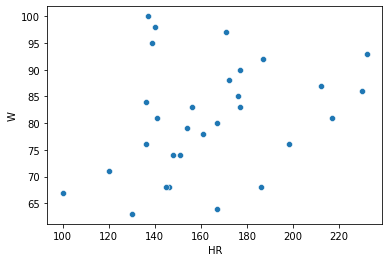

In [38]:
sns.scatterplot(x="HR",y="W",data=baseball)

<AxesSubplot:xlabel='BB', ylabel='W'>

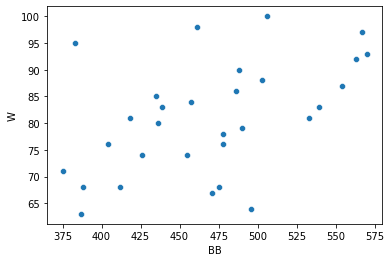

In [39]:
sns.scatterplot(x="BB",y="W",data=baseball)

<AxesSubplot:xlabel='SO', ylabel='W'>

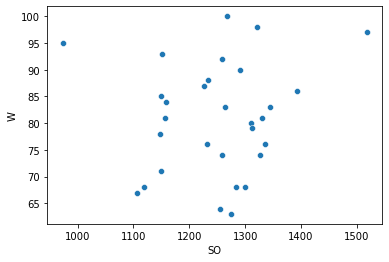

In [40]:
sns.scatterplot(x="SO",y="W",data=baseball)

<AxesSubplot:xlabel='SO', ylabel='W'>

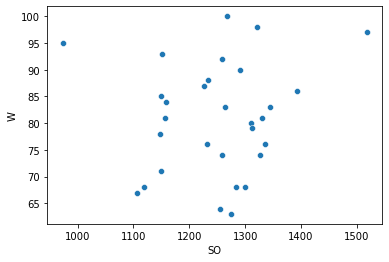

In [41]:
sns.scatterplot(x="SO",y="W",data=baseball)

<AxesSubplot:xlabel='RA', ylabel='W'>

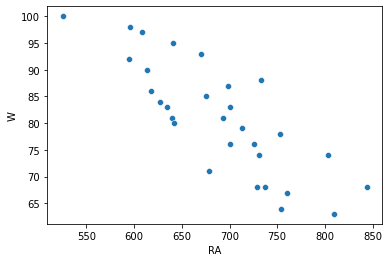

In [42]:
sns.scatterplot(x="RA",y="W",data=baseball)

<AxesSubplot:xlabel='ER', ylabel='W'>

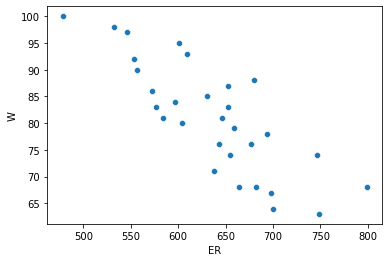

In [43]:
sns.scatterplot(x="ER",y="W",data=baseball)

<AxesSubplot:xlabel='ERA', ylabel='W'>

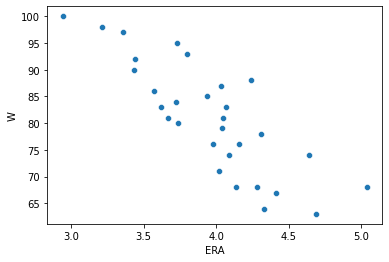

In [44]:
sns.scatterplot(x="ERA",y="W",data=baseball)

<AxesSubplot:xlabel='CG', ylabel='W'>

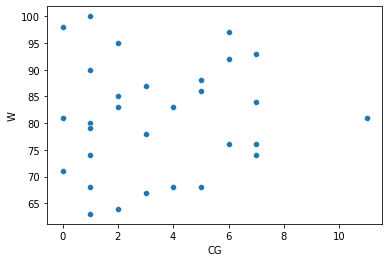

In [45]:
sns.scatterplot(x="CG",y="W",data=baseball)

**We can see as 'CG' increases 'W' also increases. So, it is positively correlated and normally distributed.**

<AxesSubplot:xlabel='SHO', ylabel='W'>

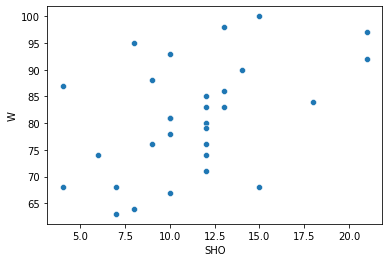

In [46]:
sns.scatterplot(x="SHO",y="W",data=baseball)

<AxesSubplot:xlabel='SV', ylabel='W'>

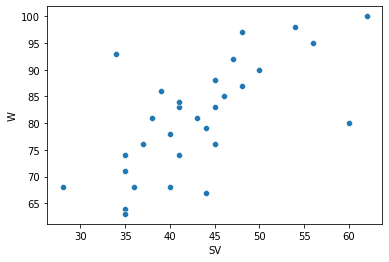

In [47]:
sns.scatterplot(x="SV",y="W",data=baseball)

<AxesSubplot:xlabel='E', ylabel='W'>

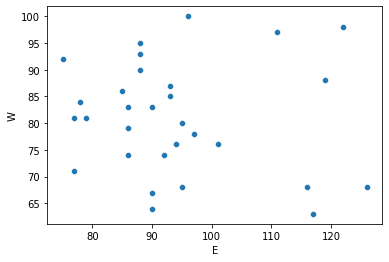

In [48]:
sns.scatterplot(x="E",y="W",data=baseball)

**It is not normally distributed and negatively correlated as column 'E' is decreasing then column 'W' is also decreasing.**

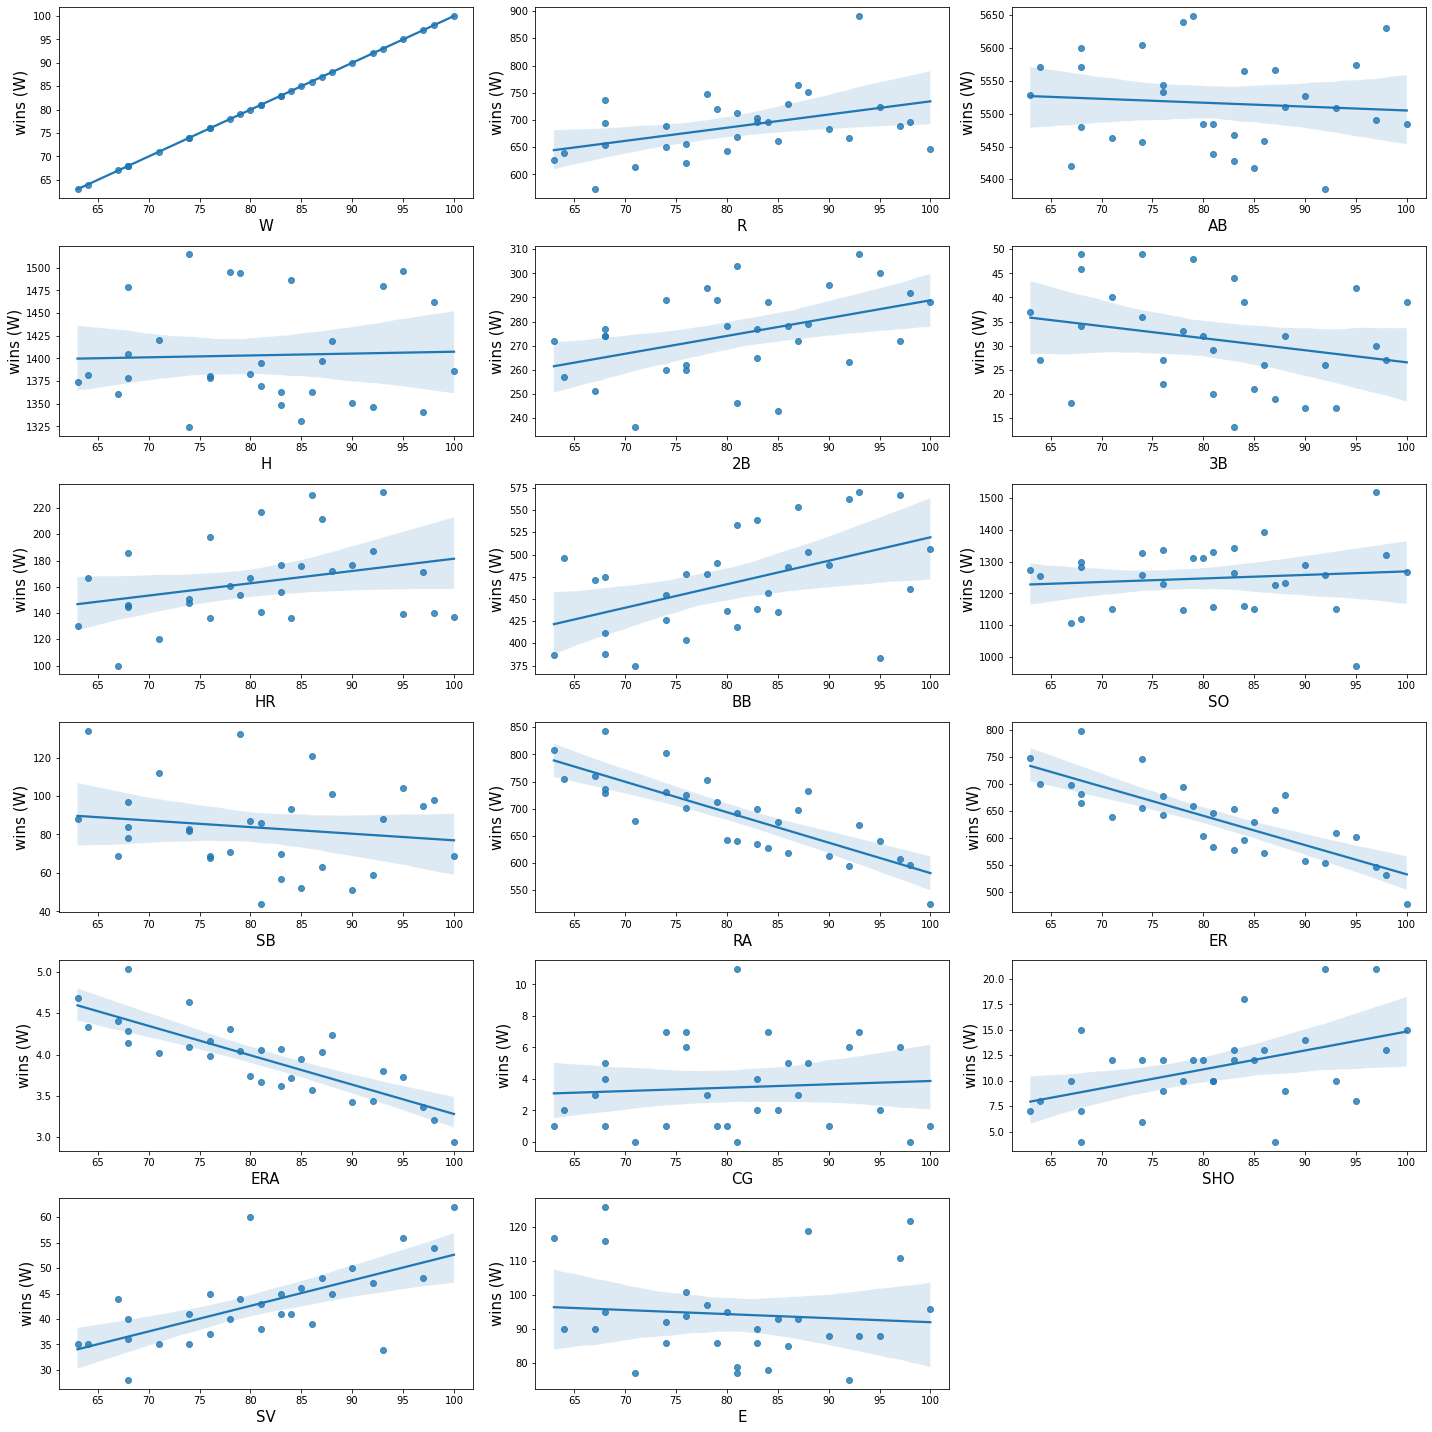

In [49]:
# To visualize clearly the relationship between features and label:

plt.figure(figsize=(20,20))
plotnumber=1
for column in baseball:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(y=baseball[column], x=baseball["W"])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('wins (W)',fontsize=15)
        
    plotnumber+=1
plt.tight_layout()


**Observations:**

**1.Columns 'AB','3B','SB' & 'ER' are normally distributed and negatively correlated with target column 'W'.**

**2.Columns 'CG' is normally distributed and positively correlated with target column 'W'.**

**3.Column 'R', 'H','HR','SV' are not normally distributed and positively correlated with target column 'W'.**

**4.Column 'E' is not normally distributed and negatively correlated with target column 'W'.**

# Multivariate analysis:

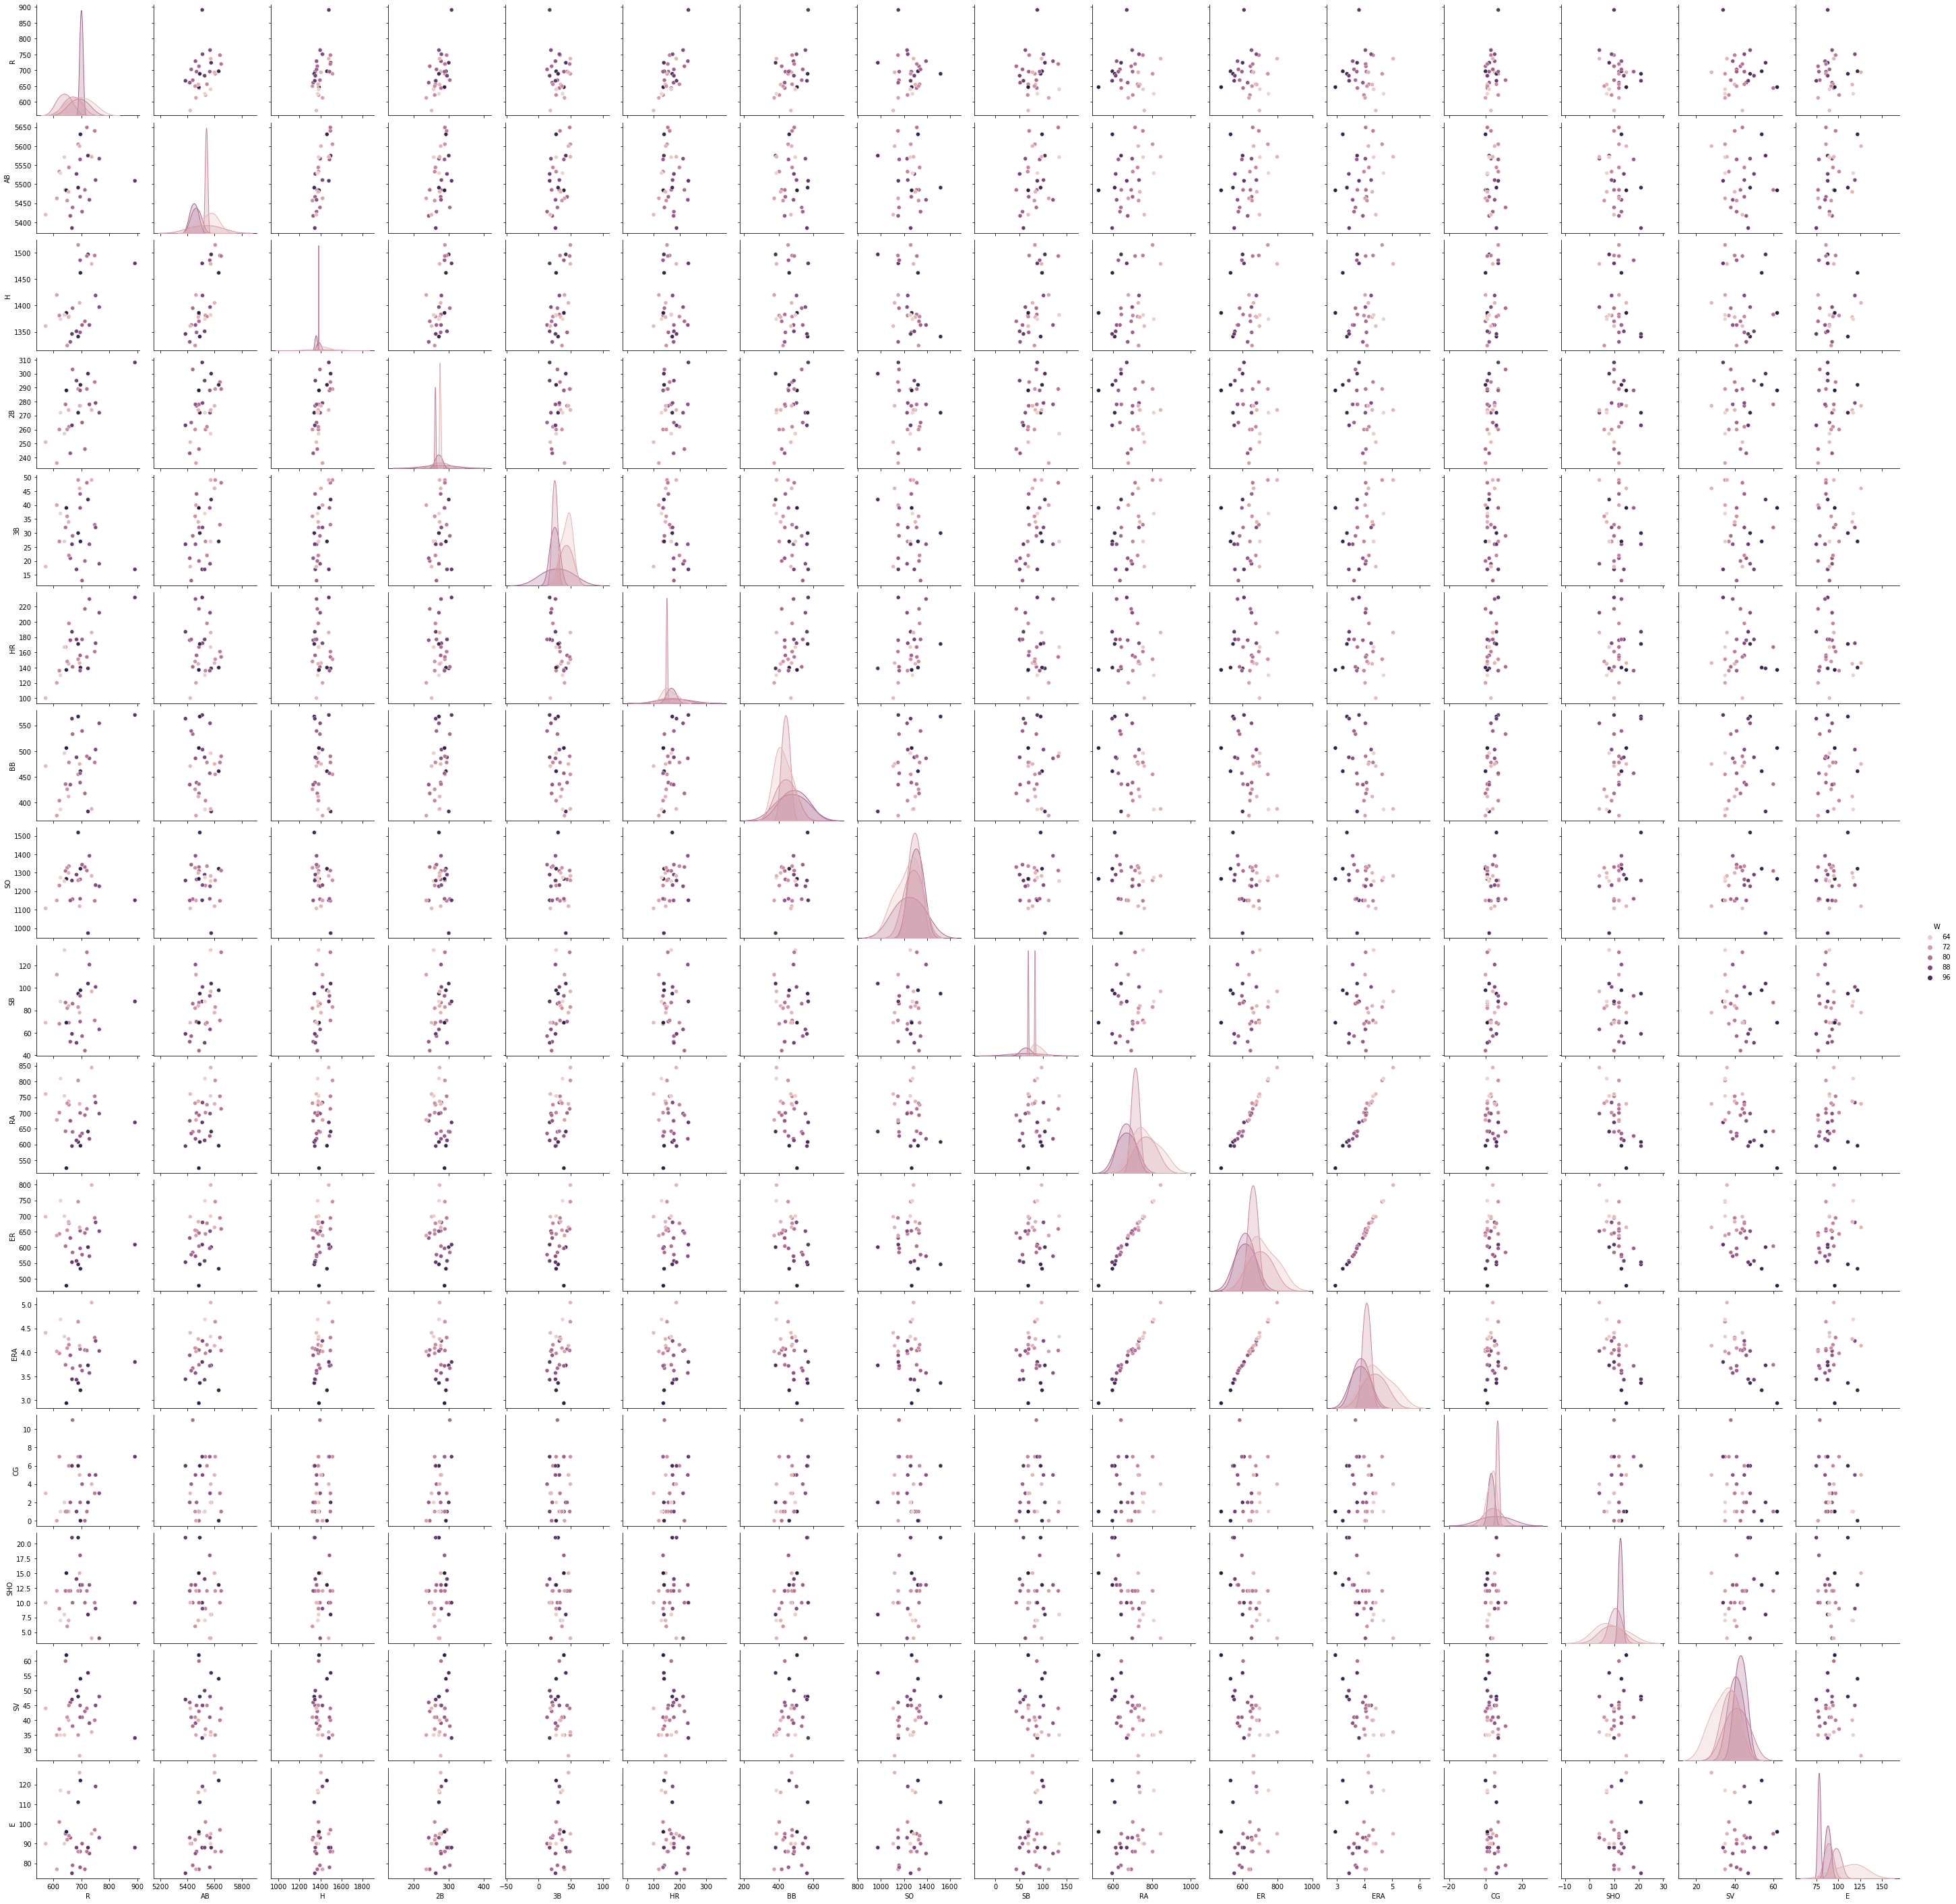

In [50]:
sns.pairplot(baseball,hue="W")

# Correlation:

In [51]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [52]:
# Let's have the correlation of each feature with target variable:

baseball.corr()["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

**Observations:**

**Here we can see that 'SV' Column is highly positively correlated with the target variable , and 'ERA' column is highly negatively correlated with the target variable.**

<AxesSubplot:>

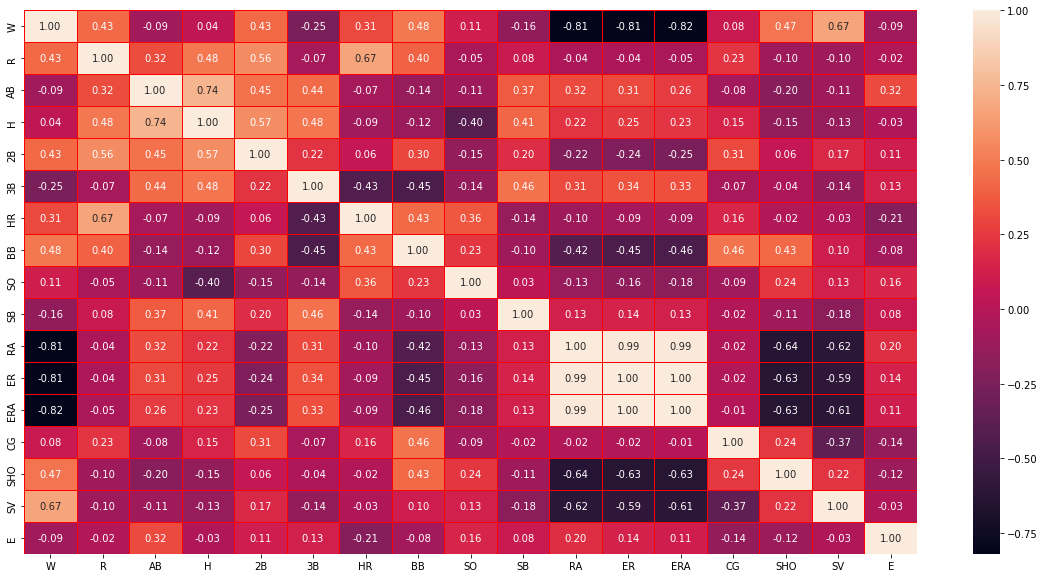

In [53]:
# To visualize the Correlation:

plt.figure(figsize=(20,10))
sns.heatmap(baseball.corr(),annot=True, linewidth=0.5, linecolor='red', fmt='.2f')

**Here , we observed that column 'H' is least correlatd with the target variable . So we can drop this column to get the better accuarcy.**

In [54]:
# Droppinh 'H' Column:

baseball.drop('H',axis=1, inplace=True)

In [55]:
# To verify , If column 'H' is dropped or not :

baseball.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Outliers Detection:

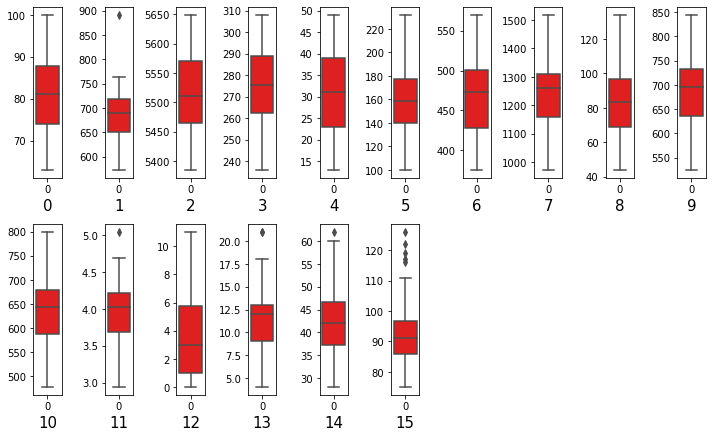

In [56]:
columns=baseball.columns.values
ncol=10
nrows=20
plt.figure(figsize=(ncol,6*ncol))
for column in range(0,len(columns)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=baseball[columns[column]],color='red',orient='r')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

In [57]:
baseball.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**Here , we can observe that the columns with index 1 ,11 ,13 ,14 & 15 have outliers i.e (R, ERA, SHO, SV and E).**

In [58]:
# To remove Outliers:

outliers = baseball[['R', 'ERA', 'SHO', 'SV', 'E']]
z=np.abs(zscore(outliers))

# Creating new dataframe
baseball_ = baseball[(z<3).all(axis=1)]
baseball_.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [59]:
z.head()

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197


In [60]:
# To display the shape of new dataset:

baseball_.shape

(29, 16)

In [61]:
# To display the total rows dropped:

baseball.shape[0]-baseball_.shape[0]

1

In [62]:
# To find the loss percentage :

loss=(30-29)/30*100
print(loss,"%")

3.3333333333333335 %


**Let's use one more method to remove outliers i.e IQR (Inter Quantile Range) method.**

In [63]:
#1st quantile
Q1=outliers.quantile(0.25)

# 3rd quantile
Q3=outliers.quantile(0.75)


In [64]:
IQR=Q3 - Q1
baseball_new=baseball[~((baseball < (Q1 - 1.5 * IQR)) |(baseball > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
# To display the shape after using IQR method:

baseball_new.shape

(20, 16)

In [66]:
# To find the rows dropped off:

baseball.shape[0]-baseball_new.shape[0]

10

In [67]:
# To find the loss percentage :

loss_ = (30-20)/30*100
loss_

33.33333333333333

**Observations:**

By using Z score and IQR method to remove outliers , we observe that there is more data loss occurs using IQR method. So we will consider Z score method as it has less loss percentage.

In [68]:
# To check for skewness :

baseball_.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

**We find that these columns i.e  'CG', 'SHO', 'SV' and 'E' have some skewness . So we have to remove skewness from these columns.**

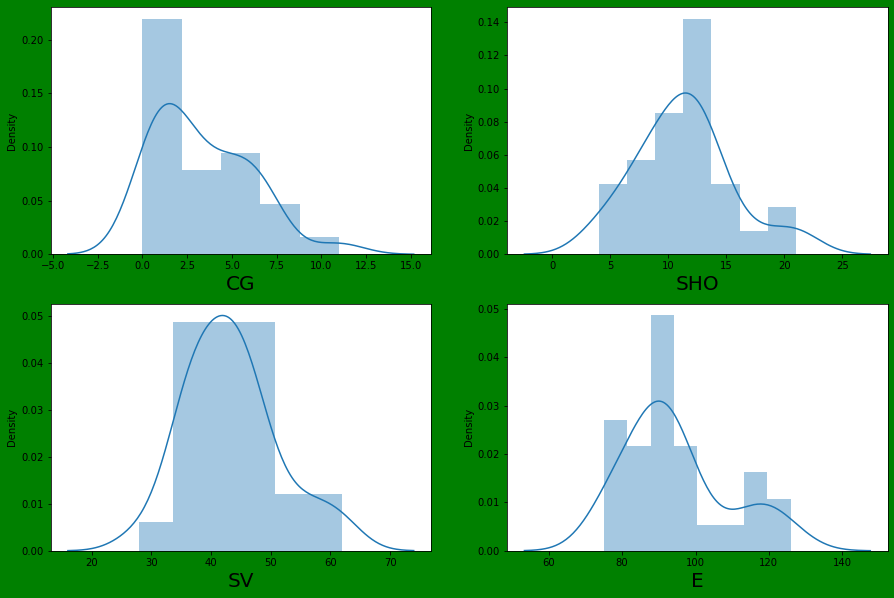

In [71]:
# To visualize skewness after using Z score method:

columns_=[ 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize=(15,10), facecolor='green')
plotnumber = 1

for column in baseball_[columns_]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(baseball_[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [73]:
columns_=['CG', 'SHO', 'SV', 'E']
baseball_[columns_]=power_transform(baseball_[columns_],method='yeo-johnson')
baseball_[columns_]

,CG,SHO,SV,E
0,-0.307098,-0.787002,1.532753,-0.348265
1,-0.307098,0.236737,0.312020,-0.540820
2,2.011315,-0.252844,-0.664137,-1.326125
3,1.264463,-0.513555,-0.820689,0.650818
4,1.264463,0.236737,-1.149165,-0.540820
6,0.121871,-2.064039,0.677176,0.082858
7,-1.732896,-0.252844,0.052325,-1.588197
8,-0.870682,0.236737,1.908137,0.237592
9,0.121871,-0.252844,-0.365006,0.383386
10,0.770649,-0.513555,0.312020,1.554265


In [74]:
# To verify , If skewness removed or not :

baseball_.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

**Great , Some of the skewness is removed from these columns.**

# Data Preprocessing:

**Splitting the Dataset:**

In [75]:
x=baseball_.drop("W",axis=1)
y=baseball_["W"]

In [76]:
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820


In [77]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [78]:
# To display the shape of training and testing data:

print(x.shape)
print(y.shape)

(29, 15)
(29,)


**To Standardize the data :**

In [79]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


In [80]:
maxAccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu)

Best accuracy is  0.8933237819250982


In [81]:
# Let's use different models to find the best model:

**KNN:**

In [82]:
# Checking R2 score for KNN Regressor
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.3668430335097005
Mean abs error:  6.37037037037037
Mean squared error:  64.01920438957474
Root Mean Squared Error:  8.001200184320771


**By using KNN Model , we get the R2 score of 36%.**

In [83]:
# Checking R2 score for Support Vector Regression Model
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)
# prediction
pred_sv=sv.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_sv))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_sv))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_sv))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_sv)))

R2 score:  0.8296615761848751
Mean abs error:  3.063913951970215
Mean squared error:  17.22310729686263
Root Mean Squared Error:  4.150073167651701


**By using SVM , we get the R2 score of 83%.**

**Gradient Boosting:**

In [84]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.2959879491220877
Mean abs error:  7.028488085401228
Mean squared error:  71.1834406998778
Root Mean Squared Error:  8.437027954195589


**By using Gradient Boosting regressor , we get the R2 score of 29%.**

In [85]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [86]:
# Checking R2 score for LASSO Regressor
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
# prediction
pred_lasso = lasso.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_lasso))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lasso))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_lasso))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score:  0.8940599915451984
Mean abs error:  2.659779286222251
Mean squared error:  10.711711965985494
Root Mean Squared Error:  3.272875183380126


**By Using LASSO Regressor , we get the R2 score of 89 %.**

In [87]:
# Let's find the Cross validation score for all the models:

In [89]:
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=4).mean())

The CV score  for Linear_regression is : -0.15779040225330682


In [90]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=4).mean())

The CV score  for  the KNN regressor is : 0.41961799979693404


In [91]:
print('The CV score  for  the SVM regressor is :',cross_val_score(sv,x,y,cv=4).mean())

The CV score  for  the SVM regressor is : 0.6996547316343916


In [92]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x,y,cv=4).mean())

The CV score  for  the GBR regressor is : 0.33108947508217135


In [93]:
print('The CV score  for  the Lasso regressor is :',cross_val_score(lasso,x,y,cv=4).mean())

The CV score  for  the Lasso regressor is : 0.7526268700682905


# Hyperparameter tuning:

In [94]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [95]:
GridCV = GridSearchCV(Lasso(),parameters,cv=4)

In [96]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [97]:
GridCV.best_params_

{'alpha': 1, 'random_state': 0}

In [98]:
# Let's Create Model:

best_model = Lasso(alpha=0.1,fit_intercept='bool',max_iter=10,selection='random',tol=1000)
best_model.fit(x_train,y_train)

Lasso(alpha=0.1, fit_intercept='bool', max_iter=10, selection='random',
      tol=1000)

In [99]:
pred = best_model.predict(x_test)

In [100]:
acc = r2_score(y_test,pred_lasso)
print(acc*100)

89.40599915451985


**So , we get the accuracy of 89% after Hyperparameter Tuning which is quite satisfying prediction.**

# Output:

In [101]:
import numpy as np
a = np.array(y_test)
predicted = np.array(best_model.predict(x_test))
Baseball_Case_Stud = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Baseball_Case_Stud

,Original,Predicted
0,98,88.997715
1,76,77.943490
2,79,73.365179
3,84,84.727684
4,100,96.291847
5,88,73.801155
6,74,73.504266
7,83,79.105543
8,68,64.709962


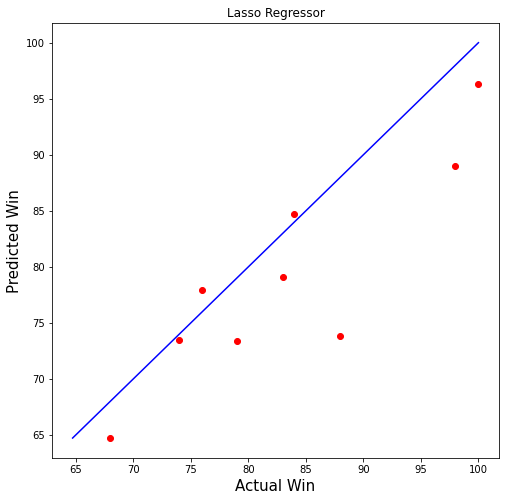

In [102]:
# Let's visualize the Output:

plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Lasso Regressor")
plt.show()